# Environment Setup

In [ ]:
!pip install pydub
!pip install urllib3 --upgrade
!pip install requests --upgrade
!pip install spotipy --upgrade
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# env variables removed for confidentiality
%env SPOTIPY_CLIENT_ID='[SPOTIPY_CLIENT_ID]'
%env SPOTIPY_CLIENT_SECRET='[SPOTIPY_CLIENT_SECRET]'
%env SPOTIPY_REDIRECT_URI='[SPOTIPY_REDIRECT_URI]'

In [ ]:
# imports
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util
import pandas as pd

# Data Harvesting

In [ ]:
scope = "user-library-read"

# user credentials
credentials = {
    'client_id' : 'e0b8bdf6c58f487db4c9c4fe2f924e7b',
    'client_secret':'f472e24e54914a158cb371c17a05d4ff',
    'redirect_uri':'http://localhost'}

# authenticate
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope,
                                               open_browser=False,
                                               client_id = credentials['client_id'],
                                               client_secret = credentials['client_secret'],
                                               redirect_uri = credentials['redirect_uri']))

Tracks are classified based on user created playlists from Spotify that are identified as a given subgenre.

There are many ways that country music can be classified, but we will be focusing on four main categories:

1. Traditional
5. Bluegrass
6. Country Pop
7. Country Rock


Rules for classifying a song under a subgenre:
1. It must appear in at least 2 of the user-generated subgenre focused playlists
2. It cannot belong to more than one subgenre, songs that belong to multiple are not included in the dataset

Dataset Structure: 1000 total songs, 250 songs per subgenre

In [ ]:
# this function takes a list of playlist links and generates a dataframe via API call
def get_dataframe_from_links(sp, links, genre):
  # create df
  df = pd.DataFrame(columns=['id','song_title','artist','mp3','genre'])
  # sort results into df
  for link in links:
    offset = 0
    num_results = 1
    while (num_results > 0 ):
      results = sp.playlist_items(link, offset=offset, limit=100) # API call, get next results up to 100
      num_results = len(results['items']) # number of results returned
      # add results to df
      for idx, item in enumerate(results['items']):
          track = item['track']
          line = {'id' : track['id'], 'song_title': track['name'], 'artist': track['artists'][0]['name'], 'mp3': track['preview_url'], 'genre':genre}
          # TODO
          if track['id'] == '3WCvtBJHaj2pILKJ0EcraH':
            print(link)
          df = df.append(line, ignore_index = True)
      offset+=100 # increase offset
  return df

# filter out songs from playlist that have less than 2 votes
def get_top_songs(playlist):
  group_by_song = playlist.groupby(['id','song_title','artist','mp3','genre'])['id'].count().sort_values(ascending=False).reset_index(name="votes")
  return group_by_song.where(group_by_song['votes']>1).dropna()

In [ ]:
# country pop
country_pop_links = ['https://open.spotify.com/playlist/6KoHqha5WtK85vjtI6TOPF?si=63de4baea0d1400e','https://open.spotify.com/playlist/6NiE3vTA7km442vNhKNYit?si=c1748590fb1d4d42',
         'https://open.spotify.com/playlist/23VFN7aXXZ0o27e63wChnh?si=d3fb1c2188804828', 'https://open.spotify.com/playlist/3o341a1QKonxtXrBsq1GLS?si=d10663450b354c23',
         'https://open.spotify.com/playlist/4Gv69Ip2MNq71pwNC55JlO?si=bffca63074554857','https://open.spotify.com/playlist/3LU1s6quTU1AvvaIzA8bUN?si=c1cf11b3bee44cb9',
         'https://open.spotify.com/playlist/7cZYGYuzR6sEhHTajUwVQr?si=a75bbeb32c9a48b6','https://open.spotify.com/playlist/3bUf0JitQBndZjuZ4FRQYi?si=6dfdfbc5108d47c9',
         'https://open.spotify.com/playlist/37i9dQZF1DXadasIcsfbqh?si=6fd45be6a4fd4b07','https://open.spotify.com/playlist/5K9L4n07y6ZH31fp08w4iO?si=bd17355abfc9496e',
         'https://open.spotify.com/playlist/1QSpQZuXJo46u0HeBGsx3j?si=f7ae40cc7b8a4900','https://open.spotify.com/playlist/2XlWXSTD1AYi4MIhhKnqCU?si=5d3f90b5190246da',
         'https://open.spotify.com/playlist/7cZYGYuzR6sEhHTajUwVQr?si=559d86cf9666404f','https://open.spotify.com/playlist/0mlPknccL87dQPEiEvagyv?si=91e48f9812a24258']
raw_country_pop = get_dataframe_from_links(sp,country_pop_links,'country_pop')
top_country_pop = get_top_songs(raw_country_pop)

In [ ]:
# country rock
country_rock_links = ['https://open.spotify.com/playlist/0v4DvG8cBpHGOBOxVuVvgV?si=57436abe08e54f7c','https://open.spotify.com/playlist/37i9dQZF1DWWH0izG4erma?si=36d2874256ed4dd8',
                      'https://open.spotify.com/playlist/74IixZCn2p16t6f5ZMAbjS?si=ad9f61ac2e6a4ded','https://open.spotify.com/playlist/0ue8LUEREzXBZK7nB0zF2v?si=37aac2da2f2a4f5c',
                      'https://open.spotify.com/playlist/7p7qUYZC1et8OQUFOPtycJ?si=898b6fae87454fa5','https://open.spotify.com/playlist/04gbSMTXt7z9exfAckAuqi?si=5d0e783f7b3c4d68',
                      'https://open.spotify.com/playlist/37i9dQZF1DX4bf0P6HTTom?si=f500ef47ade944b4','https://open.spotify.com/playlist/3TxGM94k6LOIffiTmLaec0?si=559476a65acf4d5a',
                      'https://open.spotify.com/playlist/7Mwb6C0QP9BJ3w1HRxgg2M?si=e50e0a750a7b4d89','https://open.spotify.com/playlist/55w5K1PG8tJuQ8W3s5ZgmA?si=771df1d6f4dd4cbb',
                      'https://open.spotify.com/playlist/1ZVNzHupn3rV7DunrHdHFy?si=6569c3befddb4285','https://open.spotify.com/playlist/0HUWPhXJIh6A7y1GRioUIp?si=128f2442351b4e08',
                      'https://open.spotify.com/playlist/2TN8ZPgYC2I7bZ1jLJDNX0?si=88aa3e6aebd7461e','https://open.spotify.com/playlist/6sOBrwtga2gSxWnRlkPKCJ?si=4986cca077144927',
                      'https://open.spotify.com/playlist/30JAzYAf3D1jzDybvw6A8f?si=d8180d08f91d454a']
raw_country_rock = get_dataframe_from_links(sp,country_rock_links,'country_rock')
top_country_rock = get_top_songs(raw_country_rock)

In [ ]:
# traditional
traditional_links = ['https://open.spotify.com/playlist/37i9dQZF1DXaiEFNvQPZrM?si=fZ_-6mhoRxqdA1DRny5SyQ','https://open.spotify.com/playlist/3aatAIiugJejR0KDPqPXbN?si=efef58d5aa7149ac',
                     'https://open.spotify.com/playlist/27iJ7YElwDNiF2GDTPhrzf?si=5c4fdd479c054521','https://open.spotify.com/playlist/77vIzNAmbimB2wd7UxKzsv?si=651a31dab7a94215',
                     'https://open.spotify.com/playlist/2eJJWXCIEWwGLatVUrfzRd?si=f59de8c3995148e9','https://open.spotify.com/playlist/6EU4AqbU0itfVbP9gjKuah?si=5b43a1716e264087']
raw_traditional = get_dataframe_from_links(sp,traditional_links,'traditional')
top_traditional = get_top_songs(raw_traditional)

In [ ]:
# bluegrass
bluegrass_links = ['https://open.spotify.com/playlist/5YzAGIOQKz7FXxa9ZrRtfQ?si=rhX6QF-mRYCvFUmaFdziPQ','https://open.spotify.com/playlist/5mRSNRKb9KM7jhLboTx25L?si=CXXvMF59Tqu2CfGeT_yBEQ',
                   'https://open.spotify.com/playlist/7rJcoAbhw67CTGNGuwHsIg?si=WfqkfZfmSEee5S_h8IOqoA','https://open.spotify.com/playlist/4bgULU8SKO2rKX4OJqUzRg?si=bMgr3JvkRbiA3edHqQobrQ',
                   'https://open.spotify.com/playlist/7fAm3STfjNSuUpvDxzb9eJ?si=KBOmHEY5SeyfQ6I02-wB0w','https://open.spotify.com/playlist/1f29CL4Wp41s319IUFa8iL?si=eTNicyHIQcOfDUzwY3qrlQ',
                   'https://open.spotify.com/playlist/37i9dQZF1DXa2HpTqP3clz?si=8f233a4765e44022','https://open.spotify.com/playlist/37i9dQZF1DX0RwLEp3x6W4?si=f16d409f71834035',
                   'https://open.spotify.com/playlist/37i9dQZF1DX4yaGKXS06vz?si=3704e8de80084d44','https://open.spotify.com/playlist/37i9dQZF1DX0yL7UvjSKZT?si=469b8c3044bb4940',
                   'https://open.spotify.com/playlist/37i9dQZF1DX05pIZyttLmm?si=0df8285ff0db4702','https://open.spotify.com/playlist/7fAm3STfjNSuUpvDxzb9eJ?si=c31a9d61e8b848d1',
                   'https://open.spotify.com/playlist/60qtNAcrXWoOVvoLju1VLU?si=13bf102e4b07412f','https://open.spotify.com/playlist/52xFEWBiISnai6XgoM5F0l?si=66db6f38eda64a48']
raw_bluegrass = get_dataframe_from_links(sp,bluegrass_links,'bluegrass')
top_bluegrass = get_top_songs(raw_bluegrass)

In [ ]:
# combine all the subgenres into one database
top_country = top_traditional.append([top_country_rock, top_country_pop,top_bluegrass])
print(top_country['genre'].value_counts())
print(top_country['genre'].value_counts(normalize=True) * 100)

traditional     378
country_pop     285
country_rock    280
bluegrass       260
Name: genre, dtype: int64
traditional     31.421446
country_pop     23.690773
country_rock    23.275145
bluegrass       21.612635
Name: genre, dtype: float64


In [ ]:
# remove duplicate songs to prevent confusion in classifiers
top_country_no_duplicates = top_country.drop_duplicates(subset='id', keep=False)
print(top_country_no_duplicates['genre'].value_counts())

traditional     347
country_rock    269
country_pop     258
bluegrass       252
Name: genre, dtype: int64


In [ ]:
# take top 250 remaining songs to build an evenly distributed dataset
traditional250 = top_country[top_country['genre'] == 'traditional'].sort_values('votes',ascending=False).head(250)
country_rock250 = top_country[top_country['genre'] == 'country_rock'].sort_values('votes',ascending=False).head(250)
country_pop250 = top_country[top_country['genre'] == 'country_pop'].sort_values('votes',ascending=False).head(250)
bluegrass250 = top_country[top_country['genre'] == 'bluegrass'].sort_values('votes',ascending=False).head(250)
country_df = pd.concat([traditional250, country_rock250, country_pop250, bluegrass250])
country_df

,id,song_title,artist,mp3,genre,votes
0,4TnUKixNWMfajncgdSwFoi,Amarillo By Morning,George Strait,https://p.scdn.co/mp3-preview/507af339821b35db...,traditional,5.0
1,0Xg68XXMRWzKQvD5S6BFvI,Dust On The Bottle,David Lee Murphy,https://p.scdn.co/mp3-preview/27441bddcd054139...,traditional,5.0
2,2uX5f3x2cObov0iDAPln4o,Song of the South,Alabama,https://p.scdn.co/mp3-preview/61e3be9a4d4d14d6...,traditional,4.0
4,6VChAU4QENeLwf3OaHBJxC,Must Be The Whiskey,Cody Jinks,https://p.scdn.co/mp3-preview/27f02d8042a2f650...,traditional,4.0
5,2IY559smG7SXYk229NA2Vl,Little Bitty,Alan Jackson,https://p.scdn.co/mp3-preview/906100e7688a53be...,traditional,4.0
...,...,...,...,...,...,...
105,5A6yLx7BeiUiDx3i9NY34z,Time After All,Sturgill Simpson,https://p.scdn.co/mp3-preview/ca24bbf2052dfc15...,bluegrass,2.0
106,1ap81IwnNa5QeuvMMnbZfu,Trains I Missed,Balsam Range,https://p.scdn.co/mp3-preview/c16a30da4dfe7826...,bluegrass,2.0
107,1avQ2x0WLb4l0wENRWSras,Black-Eyed Susan,Town Mountain,https://p.scdn.co/mp3-preview/6b1726f85976e0c1...,bluegrass,2.0
108,1m8kkHxWQLM3UYIUk6HNcG,Flyin' High,The Wooks,https://p.scdn.co/mp3-preview/4f71b0b564b2e465...,bluegrass,2.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/2023 Spring/CSCE 491 - Research/Data/song_metadata.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  country_df.to_csv(f)

Mounted at /content/drive


# Quick import data from Google Drive

In [ ]:
# import CSV with no sound data
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/2023 Spring/CSCE 491 - Research/Data/song_metadata.csv'
country_df = pd.read_csv(path, index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import CSV of mfcc data
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/2023 Spring/CSCE 491 - Research/Data/mfcc_data.csv'
mfcc_data = pd.read_csv(path, index_col=0)

Mounted at /content/drive


In [ ]:
# import CSV of Spotify feature data
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/2023 Spring/CSCE 491 - Research/Data/spotify_feature_data.csv'
spotify_feature_data = pd.read_csv(path, index_col=0)

# Feature Extraction

Intro: https://www.youtube.com/watch?v=mHPpCXqQd7Y

Audio processing to MFCCs for multiple audio files https://www.youtube.com/watch?v=4F-cwOkMdTE

 Model creation: https://www.youtube.com/watch?v=uTFU7qThylE


## MFCC

In [ ]:
from urllib.request import urlopen
import librosa
import pydub
import io
import numpy as np

# get wave file from spotify link
def get_mp3(audio_path):
  response = urlopen(audio_path) # get mp3 from url
  # convert mp3 to wav
  wav = io.BytesIO()
  response.seek = lambda *args: None  # allow pydub to call seek(0)
  pydub.AudioSegment.from_file(response).export(wav, "wav")
  wav.seek(0)
  return wav

# extract mfcc features and average them
def extract_features(file_name):
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
  mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  mfccs_mean = np.mean(mfccs.T,axis=0)
  return mfccs_mean

# straight up extract raw mfccs
def get_mfccs(file_name):
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
  mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  return mfccs

In [ ]:
from tqdm import tqdm

# iterate through country_df and extract mfcc from audio
mfcc_data = pd.DataFrame(columns=['class','song_title','artist'])
for index_num, row in tqdm(country_df.iterrows()):
  label =row["genre"]
  path = row["mp3"]
  id = row["id"]
  mp3 = get_mp3(path)
  mfcc = extract_features(mp3)
  # make column for every single mfcc
  columns = {}
  columns["id"] = id
  for i in range(0,len(mfcc)):
    columns["mfcc" + str(i)] = mfcc[i]
  columns["class"] = label
  columns["song_title"] = row["song_title"]
  columns["artist"] = row["artist"]
  mfcc_data = mfcc_data.append(columns, ignore_index = True)

1000it [15:10,  1.10it/s]


In [ ]:
mfcc_data

,class,song_title,artist,id,mfcc0,mfcc1,mfcc10,mfcc11,mfcc12,mfcc13,...,mfcc36,mfcc37,mfcc38,mfcc39,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9
0,traditional,Amarillo By Morning,George Strait,4TnUKixNWMfajncgdSwFoi,-135.185150,104.024681,-9.363051,11.191999,-6.687014,6.136169,...,-3.789398,-0.193109,-0.351603,-0.416487,-9.573008,18.850401,-7.869511,13.100018,-17.027992,13.382063
1,traditional,Dust On The Bottle,David Lee Murphy,0Xg68XXMRWzKQvD5S6BFvI,-84.161194,78.854645,-9.368034,10.582238,-9.677765,8.474355,...,-2.237880,-2.597088,-2.519852,1.309344,1.488169,18.707312,-14.884079,19.520359,-10.103744,16.727943
2,traditional,Song of the South,Alabama,2uX5f3x2cObov0iDAPln4o,-28.912786,89.491966,-9.468133,11.155478,-11.119102,5.287623,...,-4.978655,-1.194263,-1.425761,-1.363151,-17.181406,18.752203,-14.652349,20.007280,-12.046756,13.179341
3,traditional,Must Be The Whiskey,Cody Jinks,6VChAU4QENeLwf3OaHBJxC,3.614355,102.380005,-6.935060,11.114397,-7.058410,8.610462,...,1.252696,1.346082,-0.395782,-2.235291,-3.241920,16.219229,-10.397497,20.578775,-8.799915,12.789948
4,traditional,Little Bitty,Alan Jackson,2IY559smG7SXYk229NA2Vl,-44.001984,81.137726,-8.171578,12.365984,-9.470945,9.089442,...,-5.555744,-0.193815,-4.994690,-1.340945,-5.153664,12.110589,-10.331416,16.249416,-14.853097,11.989281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,bluegrass,Time After All,Sturgill Simpson,5A6yLx7BeiUiDx3i9NY34z,-80.916023,130.554337,-9.783939,8.235274,-9.586183,1.983641,...,-3.321288,-1.521408,-0.461460,-4.660336,-5.275846,16.456755,-10.476933,9.309164,-11.623179,5.832430
996,bluegrass,Trains I Missed,Balsam Range,1ap81IwnNa5QeuvMMnbZfu,-83.154221,132.694153,-11.562184,2.884966,-10.594386,8.663545,...,-7.094879,-3.121452,-3.252442,-4.549884,-12.777375,6.889786,-19.998835,6.169734,-10.305342,10.377418
997,bluegrass,Black-Eyed Susan,Town Mountain,1avQ2x0WLb4l0wENRWSras,-109.240143,132.690155,-17.834505,3.256446,-12.865211,-2.712814,...,-1.485242,-6.220680,-0.401873,-1.274035,-11.924454,11.928979,-18.040405,8.546843,-13.597974,2.040390
998,bluegrass,Flyin' High,The Wooks,1m8kkHxWQLM3UYIUk6HNcG,-69.577263,116.911163,-7.326690,8.894575,-7.401515,6.008835,...,-3.014953,2.945992,-2.703770,-4.659530,-13.975204,9.664983,-11.341796,10.911435,-9.415045,8.301882


In [ ]:
# save mfcc data to csv
path = '/content/drive/My Drive/2023 Spring/CSCE 491 - Research/Data/mfcc_data.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  mfcc_data.to_csv(f)

Visualization:

In [ ]:
for x in country_df.at[country_df.index[0],'mp3']:
  print(x)

https://p.scdn.co/mp3-preview/507af339821b35db27435073a9268f201b9c8a68?cid=e0b8bdf6c58f487db4c9c4fe2f924e7b
https://p.scdn.co/mp3-preview/13f321779931e5a99768c06f34c2a1615cd835db?cid=e0b8bdf6c58f487db4c9c4fe2f924e7b
https://p.scdn.co/mp3-preview/0fe61373d80c298a3690b79ea6edcf05f5b0dc24?cid=e0b8bdf6c58f487db4c9c4fe2f924e7b
https://p.scdn.co/mp3-preview/a3a9085526823c0d0c1375fb5f801fa9c14d2f38?cid=e0b8bdf6c58f487db4c9c4fe2f924e7b


In [ ]:

!pip install resampy
import resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
  from tqdm import tqdm
  import resampy
  path = "https://p.scdn.co/mp3-preview/507af339821b35db27435073a9268f201b9c8a68?cid=e0b8bdf6c58f487db4c9c4fe2f924e7b"
  mp3 = get_mp3(path)
  mfccs = extract_features(mp3)

ModuleNotFoundError: ignored

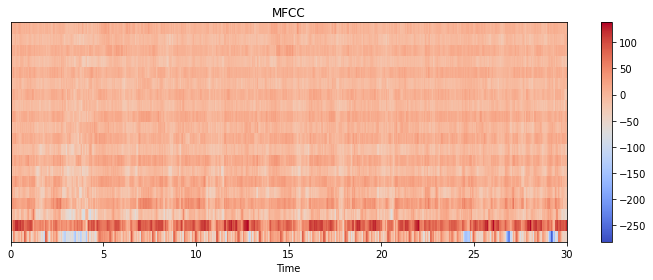

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

## Spotify Features

In [ ]:
# get dataframe
track_list = country_df['id']

# access features
i=0
spotify_feature_data = pd.DataFrame()
while (i<len(top_country)):
  if (i + 100 > len(top_country)):
    added_features = pd.DataFrame(sp.audio_features(tracks=track_list[i:len(top_country)]))
  else:
    added_features = pd.DataFrame(sp.audio_features(tracks=track_list[i:(i+100)]))
  spotify_feature_data = pd.concat([spotify_feature_data,added_features])
  i+=100

    danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.606   0.361    9   -16.031     1       0.0346        0.2640   
1          0.736   0.614   11   -11.124     1       0.0389        0.0237   
2          0.546   0.786    3    -5.060     0       0.0401        0.0915   
3          0.698   0.632    9    -6.508     1       0.0247        0.5540   
4          0.595   0.653    7    -4.935     1       0.0265        0.2460   
..           ...     ...  ...       ...   ...          ...           ...   
56         0.733   0.391    0   -12.102     1       0.0350        0.6820   
57         0.593   0.812    0    -3.935     1       0.0440        0.3510   
58         0.399   0.601    2   -11.623     1       0.0311        0.6100   
59         0.391   0.529    6   -11.095     1       0.0329        0.8450   
60         0.602   0.813   11    -5.947     1       0.0308        0.1050   

    instrumentalness  liveness  valence    tempo            type  \
0           0.00003

In [ ]:
spotify_feature_data.drop(['type','uri','track_href','analysis_url'], axis = 1, inplace=True) # drop unecessary spotify feature data
spotify_feature_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.606,0.361,9,-16.031,1,0.0346,0.2640,0.000034,0.380,0.621,121.059,4TnUKixNWMfajncgdSwFoi,173467,4
1,0.736,0.614,11,-11.124,1,0.0389,0.0237,0.000006,0.292,0.858,99.942,0Xg68XXMRWzKQvD5S6BFvI,224667,4
2,0.546,0.786,3,-5.060,0,0.0401,0.0915,0.000087,0.168,0.679,126.003,6VChAU4QENeLwf3OaHBJxC,205333,4
3,0.698,0.632,9,-6.508,1,0.0247,0.5540,0.000000,0.118,0.458,102.408,3EUl8M6SzxZl03NPkB8mUd,263760,4
4,0.595,0.653,7,-4.935,1,0.0265,0.2460,0.000000,0.264,0.542,128.930,3oW6SWwGqiZSPTiAp7ZQoH,241533,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.733,0.391,0,-12.102,1,0.0350,0.6820,0.000000,0.125,0.866,101.443,3mX9099LxzxgMm2YrJsgxp,140000,4
57,0.593,0.812,0,-3.935,1,0.0440,0.3510,0.000000,0.396,0.764,139.842,7C8gwN0JX7Df8Rfepg8nMi,193173,4
58,0.399,0.601,2,-11.623,1,0.0311,0.6100,0.944000,0.097,0.968,147.887,4NTLffbJf3EU7LqcLYVlEd,170707,4
59,0.391,0.529,6,-11.095,1,0.0329,0.8450,0.085800,0.065,0.902,161.304,5uI7caUGXYxH6pYhkRxq1z,104427,4


In [ ]:
full_data = pd.merge(top_country,spotify_feature_data, on='id')
full_data
path = '/content/drive/My Drive/2023 Spring/CSCE 491 - Research/Data/spotify_feature_data.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  full_data.to_csv(f)

# Training Models

In this section, we take the MFCC data and labels and run them through multiple machine learning models, namely:


1.   Neural Network
2.   Random Forest
3. KNN



In [ ]:
print(mfcc_data['class'].value_counts())

traditional     250
country_rock    250
country_pop     250
bluegrass       250
Name: class, dtype: int64


In [ ]:
# put features into list
import numpy as np

# list of mfcc names
mfcc_labels = []
for i in range(0,40):
  mfcc_labels.append("mfcc" + str(i))

X=np.array(mfcc_data[mfcc_labels].values)
y=np.array(mfcc_data['class'].tolist())

In [ ]:
print(X.shape)
print(y.shape)

(1000, 40)
(1000,)


## Neural Network

In [ ]:
y=np.array(pd.get_dummies(y)) # one hot encoding

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
num_labels=y.shape[1]

2.11.0


In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
24/25 [===========================>..] - ETA: 0s - loss: 12.7350 - accuracy: 0.2630
Epoch 1: val_loss improved from inf to 1.60276, saving model to saved_models/audio_classification.hdf5
25/25 [==============================] - 2s 19ms/step - loss: 12.5401 - accuracy: 0.2625 - val_loss: 1.6028 - val_accuracy: 0.5150
Epoch 2/100
18/25 [====================>.........] - ETA: 0s - loss: 5.7543 - accuracy: 0.3229
Epoch 2: val_loss improved from 1.60276 to 1.11747, saving model to saved_models/audio_classification.hdf5
25/25 [==============================] - 0s 7ms/step - loss: 5.4586 - accuracy: 0.3325 - val_loss: 1.1175 - val_accuracy: 0.5500
Epoch 3/100
19/25 [=====================>........] - ETA: 0s - loss: 3.8920 - accuracy: 0.3355
Epoch 3: val_loss improved from 1.11747 to 1.03040, saving model to saved_models/audio_classification.hdf5
25/25 [==============================] - 0s 6ms/step - loss: 3.8396 - accuracy: 0.3375 - val_loss: 1.0304 - val_accuracy: 0.5500
Epoch 4/

In [ ]:
y_pred=model.predict(X_test) # predict
y_pred=np.argmax(y_pred, axis=1) # one hot encoding
y_test=np.argmax(y_test, axis=1) # one hot encoding

7/7 [==============================] - 0s 3ms/step


Accuracy: 0.665


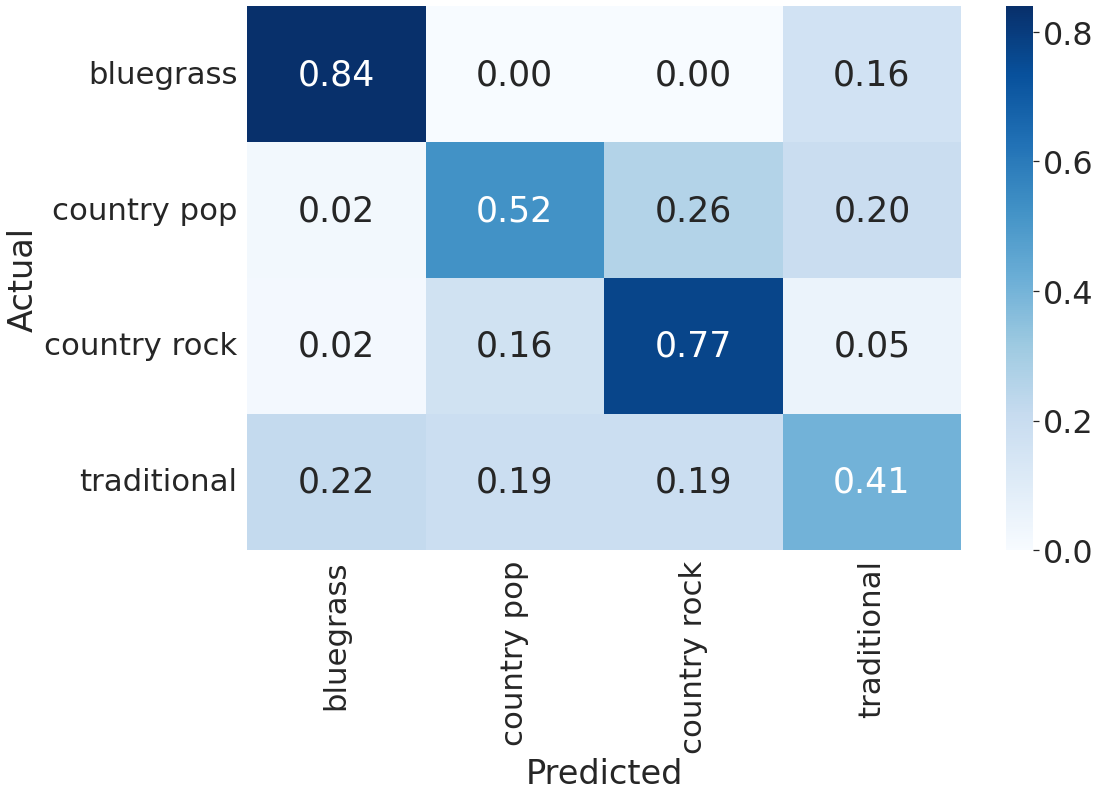

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix





print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(16,10))
cf_labels = ['bluegrass','country pop', 'country rock', 'traditional']
sn.set(font_scale=2.9)
sn.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cf_labels, yticklabels=cf_labels, cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


## Random Forest

In [ ]:
y=np.array(mfcc_data['class'].tolist())

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# find highest accuracy
max_acc = 0
best_depth = 0
best_est = 0
for num in range(1,50):
  for est in [32,64,128,256]:
    clf = RandomForestClassifier(max_depth=num, random_state=0,n_estimators=est)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    if (acc > max_acc):
      max_acc = acc
      best_depth = num
      best_est = est

print(best_depth)
print(best_est)

20
256


In [ ]:
clf = RandomForestClassifier(max_depth=best_depth, random_state=0,n_estimators=best_est)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Accuracy: 0.7


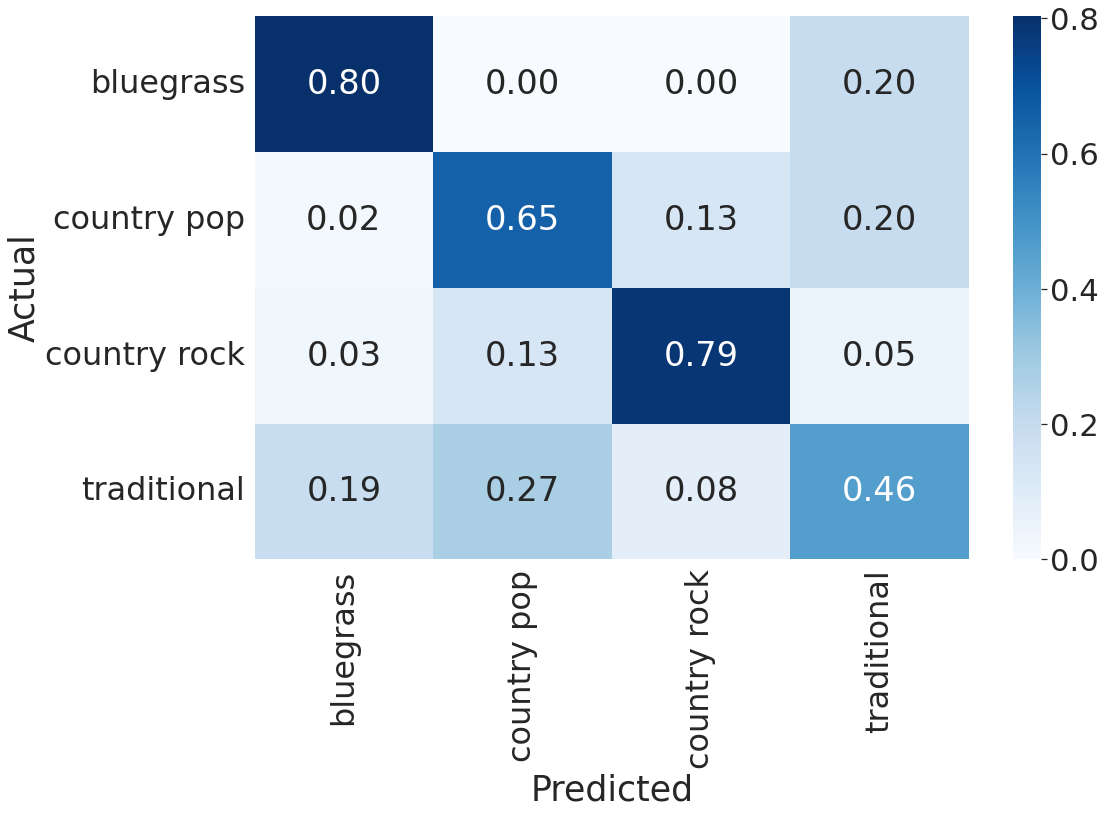

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
# Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(16,10))
cf_labels = ['bluegrass','country pop', 'country rock', 'traditional']
sn.set(font_scale=2.8)
sn.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cf_labels, yticklabels=cf_labels, cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


## KNN

In [ ]:
y=np.array(mfcc_data['class'].tolist())

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# find highest accuracy
max_acc = 0
best_neigh = 0
for num in range(1,50):
  neigh = KNeighborsClassifier(n_neighbors=num)
  neigh.fit(X_train, y_train)
  y_pred = neigh.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  if (acc > max_acc):
    max_acc = acc
    best_neigh = num

print(best_neigh)

36


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=best_neigh)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

Accuracy: 0.635


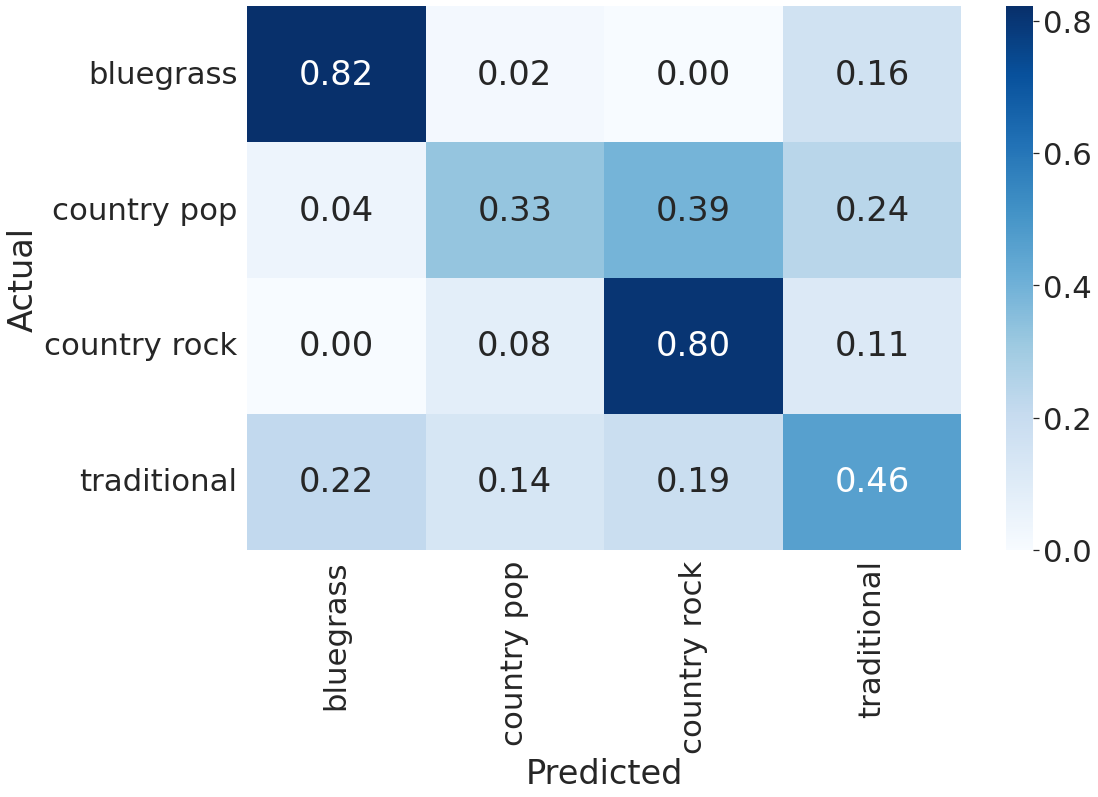

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
# Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(16,10))
cf_labels = ['bluegrass','country pop', 'country rock', 'traditional']
sn.set(font_scale=2.8)
sn.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cf_labels, yticklabels=cf_labels, cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)


# Test

In [ ]:
# test playlist
test_links = ['https://open.spotify.com/playlist/56SiGglXgEjgyr8udTYJ37?si=72a6111687854080']
test_df = get_dataframe_from_links(sp,test_links,'unknown')

In [ ]:
test_df

,id,song_title,artist,mp3,genre
0,7rr2MisgPp9gRn1ydcwpe7,West Texas in My Eye,The Panhandlers,https://p.scdn.co/mp3-preview/a4d39d3381fa6a4e...,unknown
1,3ERb3f5nGNwRcNLNoN3KRg,Drunk Driving,Koe Wetzel,https://p.scdn.co/mp3-preview/6115b88f5d5de31c...,unknown
2,2NEBP8SXEqwZt2PRdPXXuy,Everything's Gonna Be Alright,David Lee Murphy,https://p.scdn.co/mp3-preview/89f42374c747b8fa...,unknown
3,5opxZwZYGrLuWTOLW8HvMK,Purgatory,Tyler Childers,https://p.scdn.co/mp3-preview/f4c0cf27470d9aed...,unknown
4,1f3be4qP669ZuM8ZxN0S13,Every Beer,Cole Swindell,https://p.scdn.co/mp3-preview/fbc5d81d0b9ce426...,unknown
5,3NVO7DaMPP3RZEi8ilyvW5,BROKE BOY,HARDY,https://p.scdn.co/mp3-preview/16c82ee5fed4b24e...,unknown
6,7ottDUMz3VomUN2Ln9FWdI,Choices,George Jones,https://p.scdn.co/mp3-preview/28bdbf2ca1f181c8...,unknown
7,06np0ZO726l0qZTM15pVl5,Mountain Dew,Grandpa Jones,https://p.scdn.co/mp3-preview/3bf78c7d7fbd4736...,unknown
8,3GCL1PydwsLodcpv0Ll1ch,You Belong With Me,Taylor Swift,https://p.scdn.co/mp3-preview/4eb01a4dbe384e0f...,unknown
9,3cPgnLawNeUl9YsZIBdsrs,Fool Hearted Memory,George Strait,https://p.scdn.co/mp3-preview/a8c2997b89c09b77...,unknown


In [ ]:
from tqdm import tqdm

# iterate through test_df and extract mfcc from audio
test_mfcc_data = pd.DataFrame(columns=['class','song_title','artist'])
for index_num, row in tqdm(test_df.iterrows()):
  label =row["genre"]
  path = row["mp3"]
  id = row["id"]
  mp3 = get_mp3(path)
  mfcc = extract_features(mp3)
  # make column for every single mfcc
  columns = {}
  columns["id"] = id
  for i in range(0,len(mfcc)):
    columns["mfcc" + str(i)] = mfcc[i]
  columns["class"] = label
  columns["song_title"] = row["song_title"]
  columns["artist"] = row["artist"]
  test_mfcc_data = test_mfcc_data.append(columns, ignore_index = True)

10it [00:09,  1.11it/s]


In [ ]:
test_mfcc_data

,class,song_title,artist,id,mfcc0,mfcc1,mfcc10,mfcc11,mfcc12,mfcc13,...,mfcc36,mfcc37,mfcc38,mfcc39,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9
0,unknown,West Texas in My Eye,The Panhandlers,7rr2MisgPp9gRn1ydcwpe7,-105.176865,104.134392,-10.635853,13.336964,-5.708778,7.862889,...,-2.034045,-1.753785,-0.232702,-1.252824,8.764436,31.786526,-6.031141,22.901573,-10.399055,13.363359
1,unknown,Drunk Driving,Koe Wetzel,3ERb3f5nGNwRcNLNoN3KRg,-2.093343,109.511444,-12.754774,18.015158,-9.152786,7.749135,...,-2.675183,-3.797348,-0.236186,-2.120831,-8.771274,18.000551,-9.330181,15.212737,-14.518540,16.751030
2,unknown,Everything's Gonna Be Alright,David Lee Murphy,2NEBP8SXEqwZt2PRdPXXuy,-73.575562,109.958992,0.311828,13.767056,-9.104590,7.241522,...,-2.138848,-1.906607,-6.028887,-4.462168,4.035193,25.359575,-4.040236,19.999033,-7.569035,15.716728
3,unknown,Purgatory,Tyler Childers,5opxZwZYGrLuWTOLW8HvMK,-59.459858,127.491653,-5.457140,11.456486,-7.611939,4.409333,...,-1.269991,-4.608140,-7.590269,-6.870916,-17.894943,16.962971,-12.255553,14.921924,-7.153834,13.909349
4,unknown,Every Beer,Cole Swindell,1f3be4qP669ZuM8ZxN0S13,2.154237,93.319214,-8.330667,17.492018,-3.862810,10.609561,...,-1.373530,0.444371,-1.558521,-2.741729,-6.833420,26.799803,-5.949924,17.838264,-12.183347,18.182041
5,unknown,BROKE BOY,HARDY,3NVO7DaMPP3RZEi8ilyvW5,13.070162,109.834770,-12.520005,14.957083,-5.610681,7.581597,...,-3.725477,-2.024914,-1.724616,-3.325297,-11.888635,17.465597,-12.546163,16.125036,-5.688122,11.741240
6,unknown,Choices,George Jones,7ottDUMz3VomUN2Ln9FWdI,-101.826233,119.711235,-10.287284,8.026957,-10.264396,8.995792,...,-1.746657,-1.438742,1.220294,-1.652253,-1.272876,17.955881,-8.622329,20.192327,-12.234177,9.775041
7,unknown,Mountain Dew,Grandpa Jones,06np0ZO726l0qZTM15pVl5,-101.427559,117.895126,-8.904941,0.718016,-10.570301,9.954529,...,-2.037755,-1.410310,-1.258987,-2.523325,-9.217650,10.364750,-12.323974,18.265543,-18.562325,10.326136
8,unknown,You Belong With Me,Taylor Swift,3GCL1PydwsLodcpv0Ll1ch,20.397947,86.027077,-19.539970,11.218057,-10.470382,7.298697,...,-3.698198,-0.080127,-2.136367,-1.869363,-12.558751,19.367615,-11.397321,13.278362,-4.595232,12.259644
9,unknown,Fool Hearted Memory,George Strait,3cPgnLawNeUl9YsZIBdsrs,-99.903587,117.978065,-16.992725,5.102814,-6.442389,2.142690,...,-2.047873,0.294239,0.788810,-2.813922,1.121925,14.117379,-11.395720,10.492410,-18.386347,7.757228


In [ ]:
# put features into list
import numpy as np

# list of mfcc names
mfcc_labels = []
for i in range(0,40):
  mfcc_labels.append("mfcc" + str(i))

X_val=np.array(test_mfcc_data[mfcc_labels].values)
y_val=np.array(test_mfcc_data['class'].tolist())

In [ ]:
y_pred = clf.predict(X_val)
y_pred

array(['traditional', 'country_pop', 'country_pop', 'bluegrass',
       'country_rock', 'country_rock', 'traditional', 'bluegrass',
       'country_pop', 'traditional'], dtype='<U12')